<a href="https://colab.research.google.com/github/Shivanshu04/Datavisualisation/blob/main/textclassifiction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv("/content/shivanshu 45201.csv")

# Display the first few rows of the data
data.head()


<ipython-input-1-57feedb4dcdb>:4: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/shivanshu 45201.csv")


,CIN,sub class,activity code,COMPANY_NAME
0,U45201PN1891PLC000090,45201.0,45.0,AHMEDNAGAR IMARAT COMPANY LIMITED
1,U45201KL1901PTC001940,45201.0,45.0,GENERAL CONTRACTORS AND BUILDERS PRIVATE LIMITED
2,U45201KL1901PLC000893,45201.0,45.0,PERIYAR VALLEY ESTATES LIMITED
3,U45201KA1901PTC000871,45201.0,45.0,SILVER ARCH CONSTRUCTIONS PRIVATE LIMITED
4,U45201KA1905PLC000080,45201.0,45.0,THE WHITE FIELD SETTLERS ASSOCIATION


In [ ]:
from collections import Counter
import re

# Tokenize the names and split them into individual words
words = ' '.join(data['COMPANY_NAME'].dropna()).upper()
tokenized_words = re.findall(r'\w+', words)

# Count the frequency of each word
word_count = Counter(tokenized_words)

# Identify the most common word
most_common_word, most_common_count = word_count.most_common(1)[0]
most_common_word, most_common_count


('LIMITED', 7167)

In [ ]:
# Compute word counts for each company name
def word_counts(name):
    tokens = re.findall(r'\w+', name.upper())
    return {word: tokenized_words.count(word) for word in tokens}

data['word_counts'] = data['COMPANY_NAME'].dropna().apply(word_counts)

# Display the first few rows with the new word_counts column
data.head()


,CIN,sub class,activity code,COMPANY_NAME,word_counts
0,U45201PN1891PLC000090,45201.0,45.0,AHMEDNAGAR IMARAT COMPANY LIMITED,"{'AHMEDNAGAR': 1, 'IMARAT': 2, 'COMPANY': 408,..."
1,U45201KL1901PTC001940,45201.0,45.0,GENERAL CONTRACTORS AND BUILDERS PRIVATE LIMITED,"{'GENERAL': 9, 'CONTRACTORS': 137, 'AND': 1353..."
2,U45201KL1901PLC000893,45201.0,45.0,PERIYAR VALLEY ESTATES LIMITED,"{'PERIYAR': 2, 'VALLEY': 12, 'ESTATES': 342, '..."
3,U45201KA1901PTC000871,45201.0,45.0,SILVER ARCH CONSTRUCTIONS PRIVATE LIMITED,"{'SILVER': 7, 'ARCH': 8, 'CONSTRUCTIONS': 1266..."
4,U45201KA1905PLC000080,45201.0,45.0,THE WHITE FIELD SETTLERS ASSOCIATION,"{'THE': 27, 'WHITE': 5, 'FIELD': 3, 'SETTLERS'..."


In [ ]:
# Extract all word counts
all_word_counts = Counter(tokenized_words)

# Identify common and unique words
common_words = {word: count for word, count in all_word_counts.items() if count > 1}
unique_words = {word: count for word, count in all_word_counts.items() if count == 1}

len(common_words), len(unique_words)


(2227, 6304)

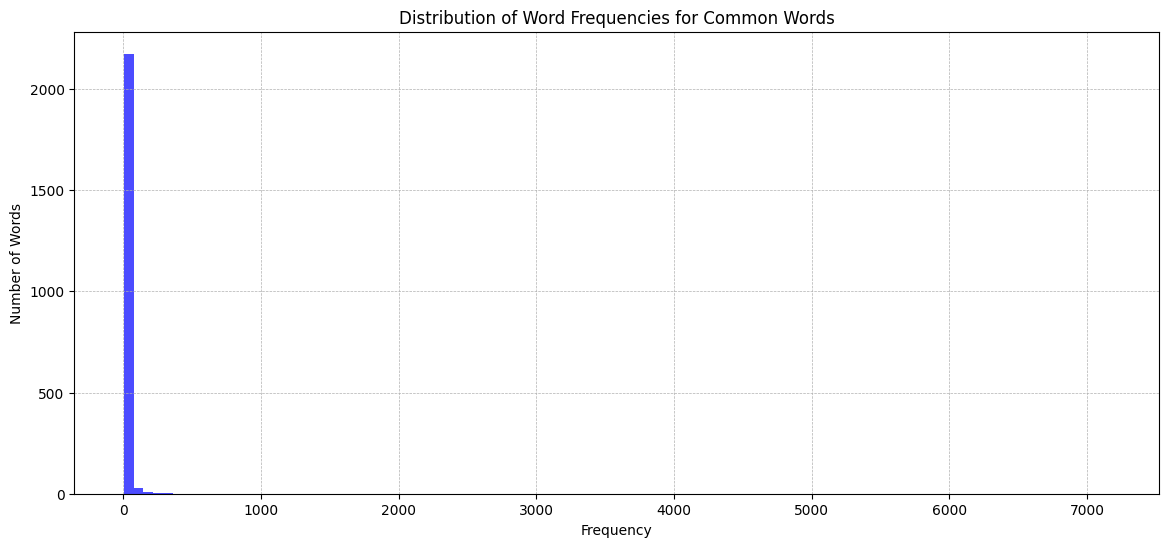

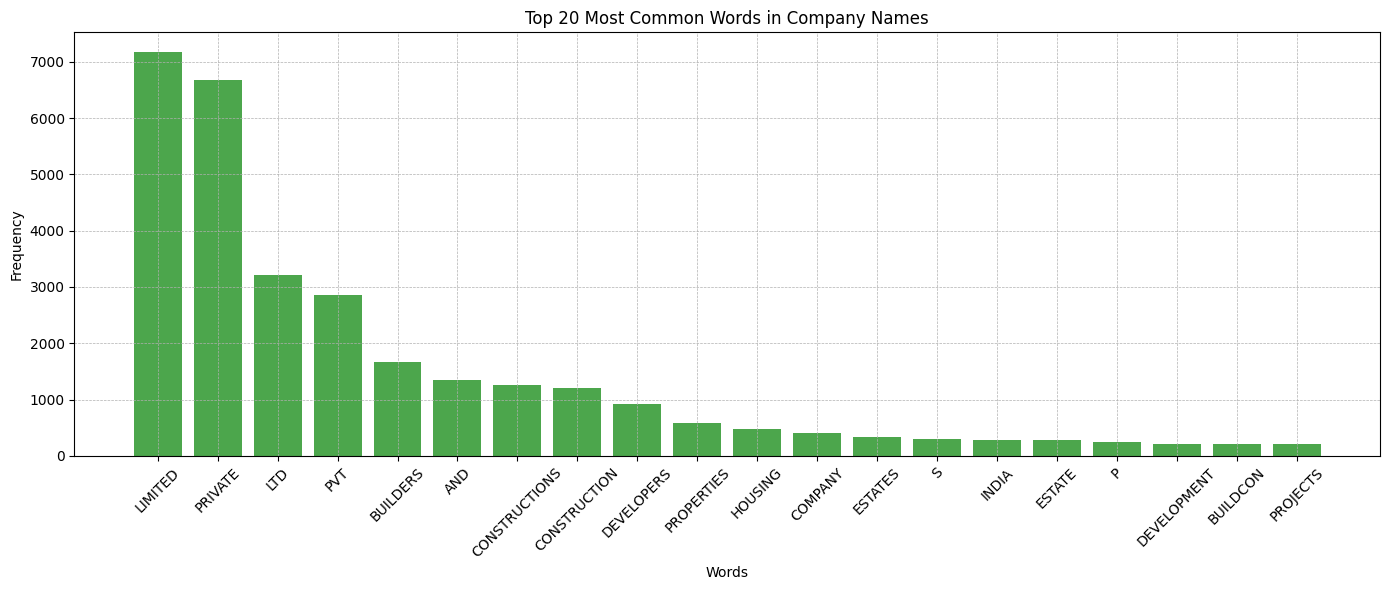

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for distribution of common word frequencies
plt.figure(figsize=(14, 6))
plt.hist(common_words.values(), bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Word Frequencies for Common Words')
plt.xlabel('Frequency')
plt.ylabel('Number of Words')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot bar chart for the top 20 most common words
most_common_20 = word_count.most_common(20)

plt.figure(figsize=(14, 6))
plt.bar([word[0] for word in most_common_20], [word[1] for word in most_common_20], color='green', alpha=0.7)
plt.title('Top 20 Most Common Words in Company Names')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The visualizations provide the following insights:


Distribution of Word Frequencies for Common Words: Most common words in company names have a frequency less than 1000. Only a few words (like "LIMITED") appear very frequently.

Top 20 Most Common Words in Company Names: Words like "LIMITED", "PRIVATE", "INDIA", "SERVICES", and "ENGINEERING" are among the most common words in company names, which indicates common business structures or sectors
